In [1]:
import pandas as pd
import numpy as np

import mglearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('application_train.csv')

In [2]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

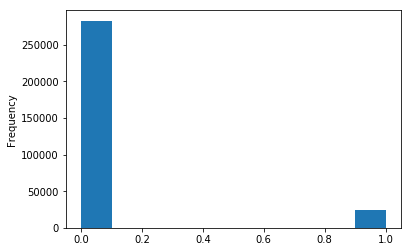

In [5]:
data['TARGET'].astype(int).plot.hist();

In [6]:
#Checking null values in text format such as 'Unknown'
z = []
i = len(data.columns)
for i in data.columns:
    if data[i].dtypes == 'object':
        z.append(i)
        
for i in z:
    print(i,data[i].unique())        

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F' 'XNA']
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers

In [7]:
data.CODE_GENDER.replace('XNA',np.nan,inplace=True)
data.NAME_FAMILY_STATUS.replace('Unknown',np.nan,inplace=True)
data.ORGANIZATION_TYPE.replace('XNA',np.nan,inplace=True)

In [8]:
#Checking null values after replacing with NaN
z = []
i = len(data.columns)
for i in data.columns:
    if data[i].dtypes == 'object':
        z.append(i)
        
for i in z:
    print(i,data[i].unique())        

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F' nan]
FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated' nan]
NAME_HOUSING_TYPE ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty

In [9]:
data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# checking the percentage of missing values in each variable
# saving missing values in a variable
missing=data.isnull().sum()/len(data)*100
missing.sort_values(ascending=False).head(100)


COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
COMMONAREA_MEDI                69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
NONLIVINGAPARTMENTS_MODE       69.432963
FONDKAPREMONT_MODE             68.386172
LIVINGAPARTMENTS_MODE          68.354953
LIVINGAPARTMENTS_MEDI          68.354953
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_MEDI                 67.848630
FLOORSMIN_AVG                  67.848630
FLOORSMIN_MODE                 67.848630
YEARS_BUILD_MODE               66.497784
YEARS_BUILD_AVG                66.497784
YEARS_BUILD_MEDI               66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_MEDI                  59.376738
LANDAREA_MODE                  59.376738
LANDAREA_AVG                   59.376738
BASEMENTAREA_MODE              58.515956
BASEMENTAREA_MEDI              58.515956
BASEMENTAREA_AVG               58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_AV

In [11]:
# saving column names in a variable
variables = data.columns
drop_variables = [ ]
for i in variables:
    if missing[i]>=20:   #setting the threshold as 20%
        drop_variables.append(i)
print(drop_variables)        

['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', '

In [12]:
print(data.shape)
#dropping  columns
df=data.drop(drop_variables,axis=1)
len(drop_variables)
print(df.shape)

(307511, 122)
(307511, 72)


In [13]:
df.dtypes.value_counts() 

int64      41
float64    20
object     11
dtype: int64

In [14]:
for col in df.columns:
         if df[col].dtype=='int64' or df[col].dtype=='float64':
              df[col].fillna(df[col].median(), inplace=True)

                   

In [15]:
# checking the percentage of missing values in each variable
missing=df.isnull().sum()/len(df)*100
missing.sort_values(ascending=False).head()


ORGANIZATION_TYPE             18.007161
NAME_TYPE_SUITE                0.420148
CODE_GENDER                    0.001301
NAME_FAMILY_STATUS             0.000650
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
           # test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [17]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (307511, 161)


In [18]:
# checking the percentage of missing values in each variable
missing=df.isnull().sum()/len(df)*100
missing.sort_values(ascending=False).head()


ORGANIZATION_TYPE_University    0.0
NAME_INCOME_TYPE_Unemployed     0.0
FLAG_DOCUMENT_21                0.0
FLAG_DOCUMENT_20                0.0
FLAG_DOCUMENT_19                0.0
dtype: float64

In [19]:
#Find correlations with the target and sort
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY                              0.032518
DAYS_REGISTRATION                                    0.041975
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [20]:
df.shape

(307511, 161)

In [21]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.ensemble import RandomForestRegressor
df_temp=df.drop(['SK_ID_CURR', 'TARGET'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df_temp=pd.get_dummies(df_temp)
model.fit(df_temp,df.TARGET)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

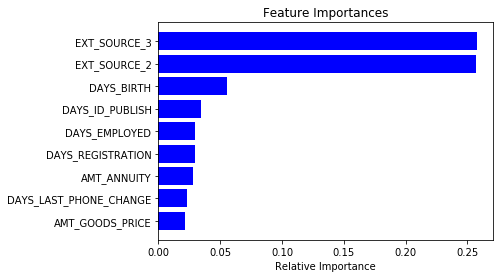

In [23]:
features = df_temp.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
selected_features=['SK_ID_CURR']
for i in indices:
   selected_features.append(features[i])
   print(features[i])

AMT_GOODS_PRICE
DAYS_LAST_PHONE_CHANGE
AMT_ANNUITY
DAYS_REGISTRATION
DAYS_EMPLOYED
DAYS_ID_PUBLISH
DAYS_BIRTH
EXT_SOURCE_2
EXT_SOURCE_3


In [25]:
X = df[selected_features].values
y = df['TARGET'].values 

In [26]:
#Split Dataset into test and train
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(230633, 10) (76878, 10) (230633,) (76878,)


In [27]:

compareRecall=[]

In [28]:

#Displaying Model Metrics 
def Report(model,y_pred):
    print('Recall score: {:.4f}'.format(recall_score(y_test,y_pred)))
    compareRecall.append(recall_score(y_test,y_pred))
    plt.title("Confusion Matrix")
    sn.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="Blues",fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('Train score: ', model.score(X_train, y_train))
    print('Test score: ', model.score(X_test, y_test))
    print('Best Parameters:',model.best_params_)

#Now we will implement Machine Learning Algorithms for binary classification to detect fall

Recall score: 0.0000


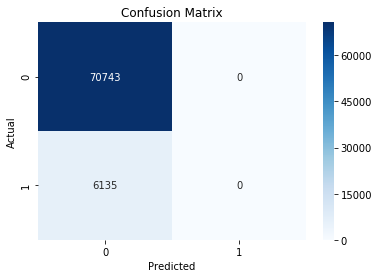

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70743
           1       0.00      0.00      0.00      6135

   micro avg       0.92      0.92      0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878

Train score:  0.9189621606621776
Test score:  0.9201982361663935
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [29]:
#1.Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
# fit the model with data
logreg.fit(X_train,y_train)

#predict y
y_pred_logreg=logreg.predict(X_test)


# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1,1]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
grid_logreg = GridSearchCV(logreg, hyperparameters, cv=3, verbose=0)

# Fit grid search
grid_logreg.fit(X_train, y_train)
y_pred_logreg = grid_logreg.predict(X_test)

#Model metrics
Report(grid_logreg,y_pred_logreg)


Recall score: 0.0000


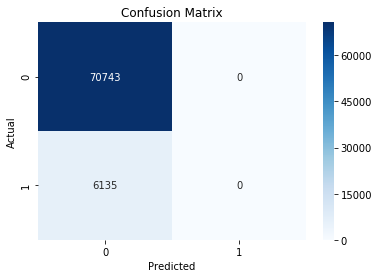

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70743
           1       0.00      0.00      0.00      6135

   micro avg       0.92      0.92      0.92     76878
   macro avg       0.46      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878

Train score:  0.5540478438650233
Test score:  0.5624270300541829
Best Parameters: {'C': 10}


In [30]:
#2.Linear SVM

linear_svc = LinearSVC()

#define a list of parameters
params_svc = {'C': [ 0.1, 1, 10]}

grid_svc = GridSearchCV(linear_svc, params_svc, cv=3, n_jobs=2,scoring = 'roc_auc', return_train_score=True)
grid_svc.fit(X_train, y_train)
y_pred_svm = grid_svc.predict(X_test)

#Model metrics
Report(grid_svc,y_pred_svm)


Recall score: 0.0016


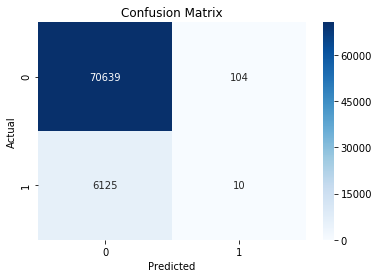

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70743
           1       0.09      0.00      0.00      6135

   micro avg       0.92      0.92      0.92     76878
   macro avg       0.50      0.50      0.48     76878
weighted avg       0.85      0.92      0.88     76878

Train score:  0.9195995369266323
Test score:  0.9189755196545175
Best Parameters: {'n_neighbors': 6}


In [31]:
# 3.KNN classifier 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params_knn= {'n_neighbors':[3,4,5,6]}
grid_knn = GridSearchCV(knn, params_knn, cv=3)

grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)
Report(grid_knn,y_pred_knn)

Recall score: 0.1593


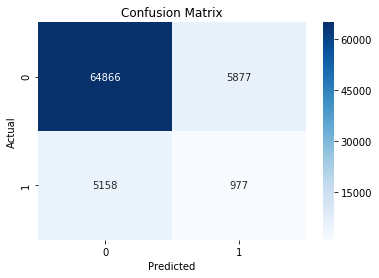

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     70743
           1       0.14      0.16      0.15      6135

   micro avg       0.86      0.86      0.86     76878
   macro avg       0.53      0.54      0.54     76878
weighted avg       0.86      0.86      0.86     76878

Train score:  1.0
Test score:  0.8564608860792424
Best Parameters: {'criterion': 'entropy'}


In [32]:
#4.Decision Tree

import warnings
warnings.filterwarnings('ignore')

tree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
#params_tree = {'criterion':['gini','entropy'],'splitter':['best','random'],'min_samples_split':[2,3],'min_samples_leaf':[2,3]}
params_tree = {'criterion':['gini','entropy']}
grid_tree = GridSearchCV(tree, params_tree, cv=3, scoring='accuracy')

grid_tree.fit(X_train, y_train)
y_pred_tree = grid_tree.predict(X_test)

#Model metrics
Report(grid_tree,y_pred_tree)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.3s remaining:    2.3s
[Para

Recall score: 0.0218


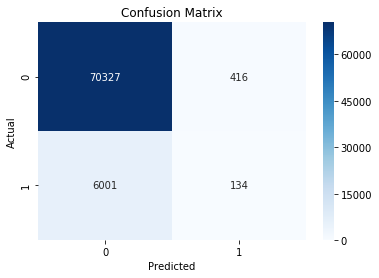

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     70743
           1       0.24      0.02      0.04      6135

   micro avg       0.92      0.92      0.92     76878
   macro avg       0.58      0.51      0.50     76878
weighted avg       0.87      0.92      0.88     76878



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s


Train score:  -0.030745816947271205
Test score:  -0.08346991336923437
Best Parameters: {'max_features': 1, 'n_estimators': 4}


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


In [33]:
#5.Random Forest
random_forest = RandomForestClassifier(random_state = 50, verbose = 1, n_jobs = -1)
#param_random = {'n_estimators': [3,4], 'max_features': [1,3], 'max_depth': [3, 6, None], 'bootstrap': [True, False]}
param_random = {'n_estimators': [3,4],'max_features': [1,3]}
grid_random = GridSearchCV(random_forest, param_random, cv=5, scoring='neg_mean_squared_error')
grid_random.fit(X_train, y_train)
y_pred_random = grid_random.predict(X_test)
#Model metrics
Report(grid_random,y_pred_random)

In [34]:
#Model Comparison
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

algoList = ["LogisticRegression", "Linear SVC","K-NN", "Decision Tree","Random Forest"]
comparison = {"Models" : algoList, "Recall" : compareRecall}
dfComparison = pd.DataFrame(comparison)

newIndex = (dfComparison.Recall.sort_values(ascending = False)).index.values
sorted_dfComparison = dfComparison.reindex(newIndex)


data = [go.Bar(
               x = sorted_dfComparison.Models,
               y = sorted_dfComparison.Recall,
               name = "Recall Scores of Models",
               marker = dict(color = "rgba(116,173,209,0.8)",
                             line=dict(color='rgb(0,0,0)',width=1.0)))]

layout = go.Layout(xaxis= dict(title= 'Machine learning Algorithms',ticklen= 5,zeroline= False),yaxis= dict(title= 'Recall'))

fig = go.Figure(data = data, layout = layout)

iplot(fig)

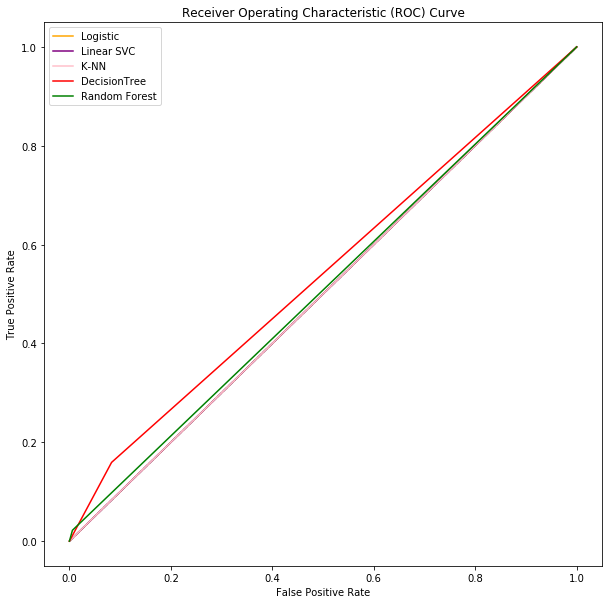

In [35]:
#ROC Curve

plt.figure(figsize = (10,10))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')


fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
plt.plot(fpr, tpr, color='orange', label='Logistic')

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr1, tpr1, color='purple', label='Linear SVC')

fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr2, tpr2, color='pink', label='K-NN')

fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_tree)
plt.plot(fpr3, tpr3, color='red', label='DecisionTree')

fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_random)
plt.plot(fpr4, tpr4, color='green', label='Random Forest')

plt.legend()
plt.show()